# Pythonで学ぶ 基礎からの機械学習入門
## 第3回 教師なし学習・クラスタリングについて学ぼう

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [67]:
all_data = pd.read_csv("consumerPrices.csv")
all_data.sort_values(by=['教養娯楽'], ascending=False)


,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費
13,神奈川県,102.5,124.7,97.6,101.9,101.7,99.0,104.4,112.6,104.8,102.1
10,埼玉県,100.9,109.3,93.0,101.8,103.1,101.0,100.6,103.7,104.5,100.7
12,東京都,103.1,133.2,94.6,102.8,96.5,101.7,104.4,108.3,104.0,99.5
26,大阪府,99.4,97.6,98.7,99.9,99.1,99.6,101.0,108.9,102.3,96.6
11,千葉県,100.6,102.0,100.4,101.0,91.7,101.1,99.1,97.9,102.0,99.6
25,京都府,100.5,92.3,101.4,100.4,98.7,97.6,102.6,112.3,101.9,101.4
27,兵庫県,99.9,100.0,99.5,101.7,105.4,98.4,100.8,102.2,101.5,103.5
22,愛知県,98.2,95.3,95.7,97.2,99.6,99.7,98.5,96.4,100.7,99.2
21,静岡県,98.7,97.2,96.8,98.0,97.4,100.2,99.5,82.0,99.9,98.4
2,岩手県,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0


In [36]:
data1 = all_data[['都道府県', '食料', '水道光熱費']]
data1.head()

,都道府県,食料,水道光熱費
0,北海道,98.7,116.3
1,青森県,97.4,109.0
2,岩手県,96.6,111.0
3,宮城県,97.2,101.3
4,秋田県,97.3,107.2


Text(0,0.5,'Fuel, Light, Water charges')

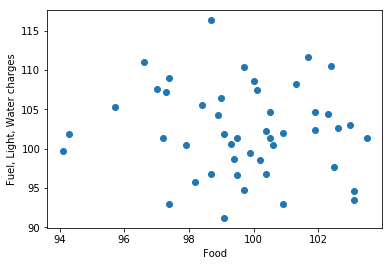

In [37]:
# %matplotlib inline

plt.scatter(data1['食料'],data1['水道光熱費'])
plt.xlabel("Food")
plt.ylabel("Fuel, Light, Water charges")

In [58]:
model_1 = KMeans(n_clusters = 3, random_state = 0)
data_1_x = data1[['食料', '水道光熱費']]
model_1.fit(data_1_x)
y1 = model_1.labels_
print(y1)

[1 1 1 0 1 1 1 0 2 2 2 0 2 2 0 0 0 2 2 0 2 2 2 2 0 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 1 0 0 0 0 0]


In [59]:
data1_results = data1.copy()
data1_results['分類結果'] = y1
data1_results.sort_values('分類結果').head()

,都道府県,食料,水道光熱費,分類結果
46,沖縄県,103.5,101.4,0
27,兵庫県,99.9,99.5,0
26,大阪府,99.4,98.7,0
25,京都府,100.5,101.4,0
24,滋賀県,99.5,101.4,0


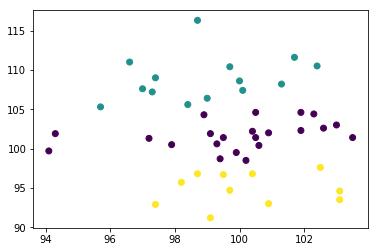

In [60]:
plt.scatter(data1_results['食料'], data1_results['水道光熱費'], c=data1_results['分類結果'])
#plt.xlabel("Food")
#plt.ylabel("Fuel,Light,Water charges")


In [ ]:
# すべての項目に対してクラスタリングを実行する

In [44]:
data2 = all_data.copy()
data2_x = data2.drop('都道府県', axis = 1)
data2_x.head()

,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費
0,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9
1,97.4,95.7,109.0,96.2,97.1,101.0,100.5,93.2,96.4,97.8
2,96.6,89.4,111.0,102.2,97.8,100.4,99.7,90.1,99.8,97.0
3,97.2,97.1,101.3,104.0,95.6,100.9,97.5,99.5,99.3,99.2
4,97.3,86.1,107.2,103.1,102.4,98.9,98.0,87.1,98.0,100.2


In [61]:
model_2 = KMeans(n_clusters=2, random_state = 0)
model_2.fit(data2_x)
y2 = model_2.labels_
data2_results = data2.copy()
data2_results["分類結果"] = y2
data2_results.sort_values("分類結果").head()

,都道府県,食料,住居,水道光熱費,家具家事用品,衣類,保険医療,交通通信,教育,教養娯楽,諸雑費,分類結果
0,北海道,98.7,82.6,116.3,99.3,103.8,100.2,99.5,93.2,97.1,100.9,0
25,京都府,100.5,92.3,101.4,100.4,98.7,97.6,102.6,112.3,101.9,101.4,0
26,大阪府,99.4,97.6,98.7,99.9,99.1,99.6,101.0,108.9,102.3,96.6,0
27,兵庫県,99.9,100.0,99.5,101.7,105.4,98.4,100.8,102.2,101.5,103.5,0
28,奈良県,94.3,84.2,101.9,98.9,93.3,99.3,100.4,95.2,99.3,99.3,0


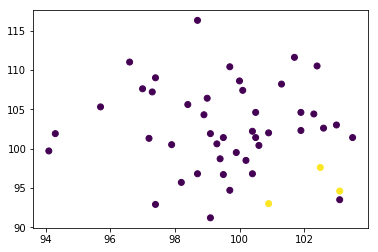

In [63]:
plt.scatter(data2_results['食料'], data2_results['水道光熱費'], c=data2_results['分類結果'])

Text(0,0.5,'kyouyou-goraku')

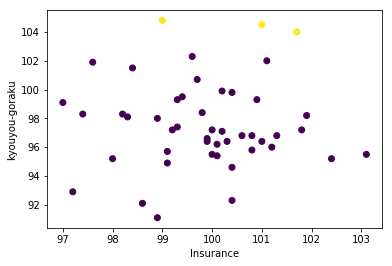

In [65]:
plt.scatter(data2_results['保険医療'], data2_results['教養娯楽'], c=data2_results['分類結果'])
plt.xlabel("Insurance")
plt.ylabel("kyouyou-goraku")
